In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
import numpy as np
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


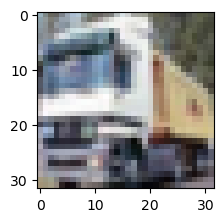

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
plt.subplot(1,2,1)
plt.imshow(x_train[1, :, : ])
plt.show()


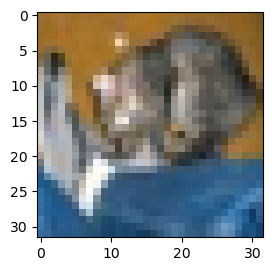

In [6]:
plt.subplot(122)
plt.imshow(x_test[0,:,:])


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_test = x_test/255
x_train = x_train / 255


In [8]:
from keras.utils import to_categorical
encoded_x = to_categorical(y_train)
encoded_y = to_categorical(y_test)

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
encoded_x[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split
train,valid, train_label, valid_label = train_test_split(x_train, encoded_x, test_size=0.20,random_state=13)

In [12]:
print(train.shape)
print(valid.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
import keras
from keras.models import Sequential,Model
from tensorflow.keras import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

In [20]:
batch_size = 32
epocs = 10
number_classes = 10


In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(number_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                      

In [27]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [28]:
model.fit(train, train_label, batch_size=batch_size,epochs=epocs,verbose=1,validation_data=(valid, valid_label))

Epoch 1/10
1250/1250 [==============================] - 32s 25ms/step - loss: 1.6743 - accuracy: 0.3844 - val_loss: 1.3327 - val_accuracy: 0.5211
Epoch 2/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3226 - accuracy: 0.5247 - val_loss: 1.1255 - val_accuracy: 0.5981
Epoch 3/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.1812 - accuracy: 0.5791 - val_loss: 0.9819 - val_accuracy: 0.6513
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.0952 - accuracy: 0.6112 - val_loss: 0.9126 - val_accuracy: 0.6842
Epoch 5/10
1250/1250 [==============================] - 32s 25ms/step - loss: 1.0449 - accuracy: 0.6312 - val_loss: 0.9677 - val_accuracy: 0.6584
Epoch 6/10
  66/1250 [>.............................] - ETA: 26s - loss: 1.0073 - accuracy: 0.6458